# Node Pair Feature Ranking, with Algorithm Runs

Taking all node pairs from all graphs (across all mu levels), pairs are classified into "same community" or "different community" based on runs of the algorithm. This means that a) the node features are calculated depending on the algorithm and b) the "same community" or "different community" label depends on the classification by the algorithm. The label will be "same community" if the algorithm classifies the pair in the same community MORE than half of the time, and "different community" if the algorithm classifies the pair in the same community LESS than half of the time.

In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from tqdm import tqdm, trange

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Louvain Data

### Train subset

Due to the very large number of data points in the node pair dataset, we select a subset of 4000 of these for training the random forest and save these in a separate CSV file.

In [2]:
X_train = pd.read_csv('node_pair_louvain_x_train.csv', index_col=0)
y_train = pd.read_csv('node_pair_louvain_y_train.csv', index_col=0)

ts = len(X_train) - 4000

X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, test_size=ts)

X_train.to_csv('node_pair_louvain_x_train_subset.csv')
y_train.to_csv('node_pair_louvain_y_train_subset.csv')

### Feature ranking with random forest

Now we're going to perform the node feature ranking using a random forest. During training, we will use a stratified k-fold cross-validation scheme.

In [3]:
runs = 100

In [4]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [5]:
accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier(n_jobs=-1)

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = { "run" : fold_count }
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

### Check accuracy scores

Let's have a look at the accuracy scores to make sure the model is working.

In [6]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.91375, 0.91125, 0.9125, 0.91, 0.9125, 0.91, 0.915, 0.9175, 0.9075, 0.91375, 0.90625, 0.91375, 0.915, 0.9175, 0.91625, 0.9125, 0.91375, 0.91375, 0.91625, 0.91, 0.915, 0.91625, 0.90875, 0.915, 0.90875, 0.91125, 0.9125, 0.9075, 0.91, 0.915, 0.90875, 0.91375, 0.91, 0.91125, 0.91625, 0.9125, 0.91, 0.91, 0.9125, 0.91125, 0.91, 0.91125, 0.90875, 0.9125, 0.91, 0.91375, 0.9125, 0.90875, 0.91, 0.91125, 0.91125, 0.91125, 0.9125, 0.915, 0.9075, 0.9125, 0.915, 0.9225, 0.91125, 0.91375, 0.91125, 0.915, 0.91125, 0.915, 0.9125, 0.9125, 0.91, 0.9125, 0.91125, 0.91625, 0.9125, 0.91625, 0.91, 0.9075, 0.91625, 0.9125, 0.90625, 0.9175, 0.91, 0.915, 0.91125, 0.91125, 0.91125, 0.9125, 0.91625, 0.90875, 0.91125, 0.91, 0.91375, 0.91625, 0.9225, 0.91375, 0.9075, 0.91625, 0.91375, 0.91375, 0.90875, 0.9125, 0.91, 0.9125]
~~~~~~~~~~~~~~~~~~~~~
0.912955


In [7]:
df_importances = pd.DataFrame(rows).set_index("run")

In [8]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

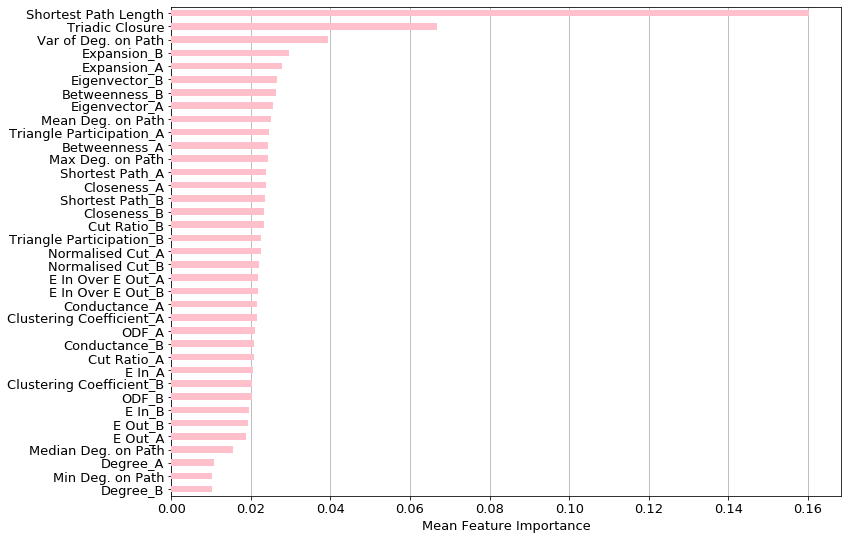

In [9]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(12,9), color="pink", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

## Infomap Data

### Train subset

Due to the very large number of data points in the node pair dataset, we select a subset of 4000 of these for training the random forest and save these in a separate CSV file.

In [11]:
X_train = pd.read_csv('node_pair_infomap_x_train.csv', index_col=0)
y_train = pd.read_csv('node_pair_infomap_y_train.csv', index_col=0)

ts = len(X_train) - 4000

X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, test_size=ts)

X_train.to_csv('node_pair_infomap_x_train_subset.csv')
y_train.to_csv('node_pair_infomap_y_train_subset.csv')

### Feature ranking with random forest

Now we're going to perform the node feature ranking using a random forest. During training, we will use a stratified k-fold cross-validation scheme.

In [12]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [13]:
accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier(n_jobs=-1)

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = { "run" : fold_count }
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

### Check accuracy scores

Let's have a look at the accuracy scores to make sure the model is working.

In [14]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.92125, 0.92625, 0.92, 0.91875, 0.92625, 0.92375, 0.925, 0.91875, 0.92375, 0.92, 0.92, 0.91875, 0.92, 0.92375, 0.92125, 0.92125, 0.92375, 0.92625, 0.925, 0.925, 0.91625, 0.92125, 0.92125, 0.92375, 0.925, 0.92375, 0.92, 0.9225, 0.9225, 0.9225, 0.92375, 0.91875, 0.9225, 0.91625, 0.9225, 0.92375, 0.9225, 0.91625, 0.92, 0.92125, 0.9225, 0.92125, 0.92375, 0.91875, 0.925, 0.9225, 0.92125, 0.91875, 0.9175, 0.92, 0.92125, 0.92625, 0.92, 0.9225, 0.92125, 0.92375, 0.92, 0.92, 0.91875, 0.92, 0.92375, 0.91875, 0.91875, 0.9225, 0.91875, 0.92375, 0.92375, 0.92125, 0.92125, 0.92125, 0.91875, 0.9225, 0.92, 0.91875, 0.92125, 0.92, 0.92, 0.9175, 0.92, 0.92125, 0.925, 0.92, 0.92875, 0.91875, 0.925, 0.9175, 0.92625, 0.925, 0.92375, 0.9175, 0.92, 0.92125, 0.9225, 0.9225, 0.9225, 0.925, 0.9225, 0.92125, 0.925, 0.9225]
~~~~~~~~~~~~~~~~~~~~~
0.9215525


In [15]:
df_importances = pd.DataFrame(rows).set_index("run")

In [16]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

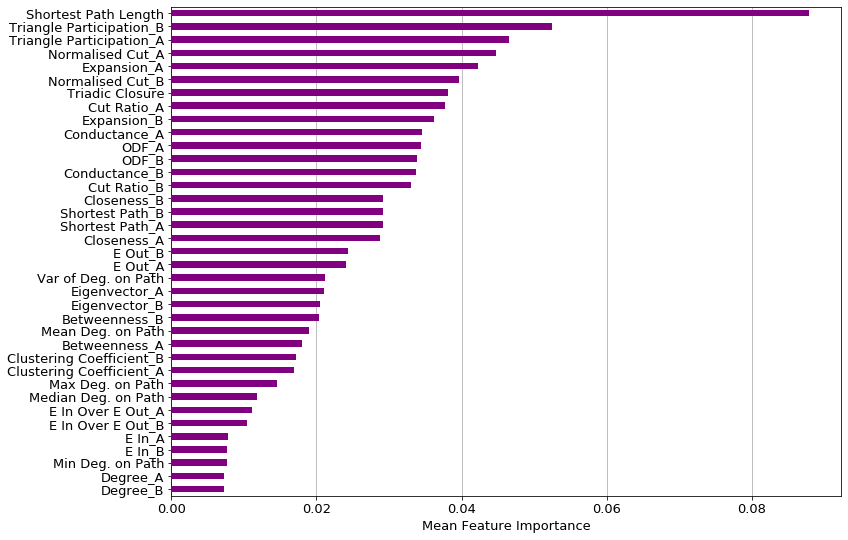

In [17]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(12,9), color="purple", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()